# CNN Image Classfier: Human Facial Eexpression Recognition

The goal of this project is to build a model that recognizes human facial expressions using FER-2013 dataset.
The reported human accuracy is reprted in [1] to be 68±5% so I will use this as the Bayes rate.
[1] "Challenges in Representation Learning: A report on three machine learning contests", Ian J. Goodfellow et. al.

# Model Development

In [1]:
import numpy as np
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import pandas as pd
import time
import os
import pickle
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

# Load prepared data and create image generator for training

In [2]:
# read the split and prepared data (see in data_preperatoin.ipynb)
with open('data/prepared_and_split_data_dict.pkl', 'rb') as file:
    data = pickle.load(file)

In [3]:
# Unpack the the data
X_train, y_train, X_dev, y_dev, X_test, y_test = data.values()

**To avoid overfitting the dev set. We are going to split the train data into train and train_dev sets.
So the sets we have are now four: train, train_dev, dev, and test. This will give us a room to train a model that generlizes well**

In [4]:
# Split train data into train and train_dev
X_train, X_train_dev, y_train, y_train_dev = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [5]:
# normalize the data
X_train = X_train.astype('float64')
X_train_dev = X_train_dev.astype('float64')
X_dev = X_dev.astype('float64')
X_test = X_test.astype('float64')
X_train /=225.0
X_train_dev /=225.0
X_dev /=225.0
X_test /=225.0

In [6]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
train_generator = datagen.flow(X_train, y_train, batch_size=32)

In [7]:
# Some utility functions

def train_model(model):
    # EarlyStopping callback setup
    early_stopping = EarlyStopping(
        monitor='val_loss',   # Metric to monitor (e.g., 'val_loss', 'val_accuracy')
        patience=20,           # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
        verbose=1             # Verbosity mode (0 = silent, 1 = display a message when stopping)
    )

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)

    # Train the model with EarlyStopping
    history = model.fit(
        X_train, y_train,  # Training data and labels
        validation_data=(X_train_dev, y_train_dev),  # Validation data and labels
        epochs=200,  # Maximum number of epochs to train
        callbacks=[early_stopping],  # Add the EarlyStopping callback here
        verbose=1  # Display training progress
    )
    
    # Evaluate the model on the test set after training
    return history

def plot_history(history):
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='lower right')

Now lets start with building few models with different arcitechtures and try them out for few epohs to see which one
is perfroming better and take it as a candidte for further tuning

# Model description

In [ ]:
model = tf.keras.models.load_model('model_5_5.h5')

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,04

 Total params: 3,919,113 (14.95 MB)

 Trainable params: 3,916,167 (14.94 MB)

 Non-trainable params: 2,944 (11.50 KB)

 Optimizer params: 2 (12.00 B)

# Model Performance

## Human perfromance, Bias, and Variance

In [12]:
# Predict on train data
y_train_prob = model.predict(X_train)
# Convert predicted probabilities to class labels (for multi-class classification)
y_train_pred = tf.argmax(y_train_prob, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print(f"train set accuracy: {accuracy:.4f}")

# Predict on train_dev data
y_train_dev_prob = model.predict(X_train_dev)
# Convert predicted probabilities to class labels (for multi-class classification)
y_train_dev_pred = tf.argmax(y_train_dev_prob, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_train_dev, y_train_dev_pred)
print(f"train_dev set accuracy: {accuracy:.4f}")

# Predict on dev data
y_dev_pred_prob = model.predict(X_dev)
# Convert predicted probabilities to class labels (for multi-class classification)
y_dev_pred = tf.argmax(y_dev_pred_prob, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_dev, y_dev_pred)
print(f"dev set accuracy: {accuracy:.4f}")

# Predict on test data
y_test_pred_prob = model.predict(X_test)
# Convert predicted probabilities to class labels (for multi-class classification)
y_test_pred = tf.argmax(y_test_pred_prob, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)

print(f"test set accuracy: {accuracy:.4f}")

1724/1724 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
train set accuracy: 0.8259
575/575 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
train_dev set accuracy: 0.6530
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
dev set accuracy: 0.6509
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
test set accuracy: 0.6570



The human performance on the dataset is reported in [1] to be 68±5%, which I will use as the Bayes rate. Although the model is clearly overfitting to the training data, as evidenced by the accuracy gap between the training and training-dev sets (82.59% vs. 65.30%, respectively), the model's performance still exceeds the Bayes rate, making the high bias situation acceptable.

The accuracy on the remaining sets—training-dev set: 65.30%, dev set: 65.09%, and test set: 65.70%—indicates that the model performs consistently well across all three sets, with no significant variance or signs of data distribution mismatch. More importantly, the model's accuracy is only ~2% below human performance.

Next, we will closely examine the errors made by the model to understand their sources and explore potential improvements.


[1] "Challenges in Representation Learning: A report on three machine learning contests", Ian J. Goodfellow et. al.

## Confusion matrix (dev set)

In [16]:
cm = confusion_matrix(y_dev, y_dev_pred)

In [19]:
cm

array([[263,  12,  32,  18,  60,  18,  64],
       [ 13,  35,   2,   1,   3,   0,   2],
       [ 46,   6, 163,  18, 136,  65,  62],
       [ 11,   1,   9, 752,  26,  21,  75],
       [ 59,  10,  44,  27, 367,  13, 133],
       [ 11,   1,  14,  13,  12, 354,  10],
       [ 37,   1,  16,  41, 102,   8, 402]])

In [17]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

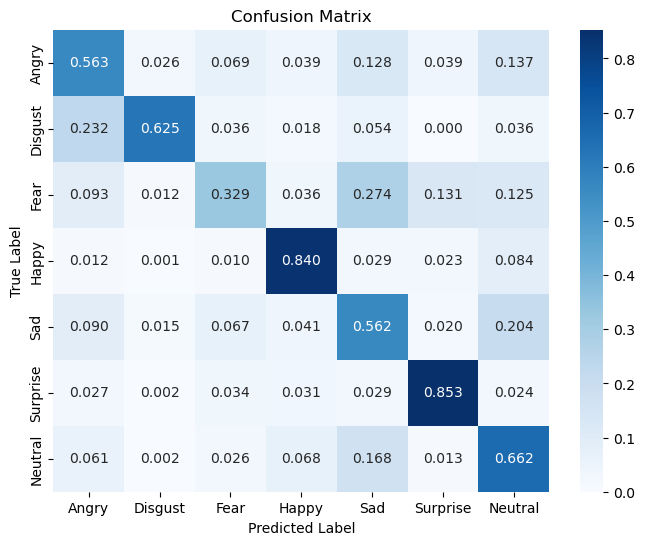

In [18]:
emotions_map = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='0.3f', cmap='Blues', xticklabels=emotions_map.values(), yticklabels=emotions_map.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The model demonstrates strong performance in recognizing Happy and Surprise emotions, achieving approximately 85% accuracy. It performs moderately well on Neutral, Sad, Disgust, and Angry emotions, with about 60% accuracy. However, the model struggles with Fear, correctly classifying it only 30% of the time.

To investigate this issue, we will:

- Manually inspect 100 images labeled as Fear to determine if any were mislabeled.
If a significant number of images are mislabeled, we will consider correcting the labels in the training set, assuming the training and dev data come from the same distribution. However, the potential accuracy improvement from this correction is estimated to be around 0.1, given the current distribution (0.7 * 1/7). Since relabeling data is time-consuming, we should explore other areas of improvement first before committing to label correction.
- If the data is not significantly mislabeled, we will assess the inherent difficulty in recognizing Fear. If the misclassification is primarily due to subtle expressions, we may choose to accept the model's limitations.
- Alternatively, we might need to obtain more images of Fear to improve the model's accuracy.

This approach ensures we prioritize the most effective strategies for enhancing the model while considering the cost and benefit of each potential improvement.

In [21]:
emotions_map

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happy',
 4: 'Sad',
 5: 'Surprise',
 6: 'Neutral'}

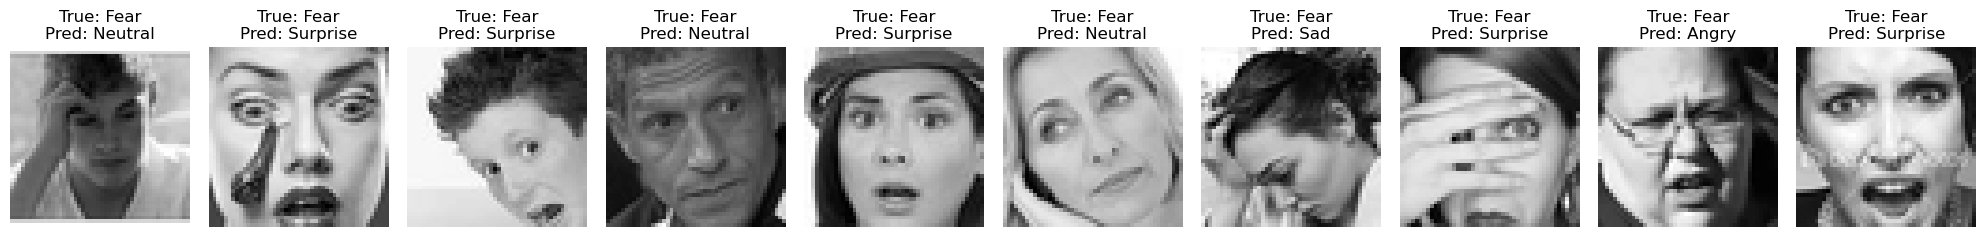

In [35]:
# Find the misclassified fear indices
misclassified_indices = np.where((y_dev==2)&(y_dev != y_dev_pred))[0]

# Limit to the first 100 misclassified examples
misclassified_indices = misclassified_indices[:10]

# Plot misclassified examples
plt.figure(figsize=(20, 20))

for i, index in enumerate(misclassified_indices):
    plt.subplot(10, 10, i + 1)  # Create a grid of 10x10 subplots for 100 examples
    plt.imshow(X_dev[index].reshape(48, 48), cmap='gray')  # Example for image data (reshape if needed)
    plt.title(f'True: {emotions_map[y_dev[index]]}\nPred: {emotions_map[y_dev_pred[index].numpy()]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In 9 out of the 10 images above, I, as a normal human observer, would clearly identify them as mislabeled. Furthermore, 6 of these images were correctly labeled by the model. This suggests that the primary reason for the model's low performance on the Fear emotion is likely due to mislabeled data. Ideally, I would inspect at least 100 images to confirm this, but given that this is a demo project, and the high prevalence of mislabeling in just these 10 images, this conclusion seems justified.

Next, let's examine the performance on the other mislabeled emotions to determine if there are broader labeling issues that could be affecting the model's overall accuracy.

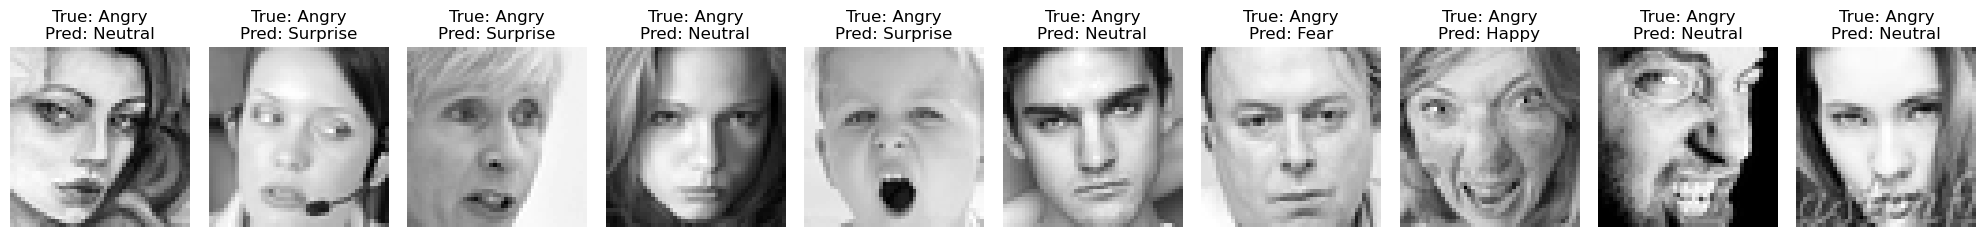

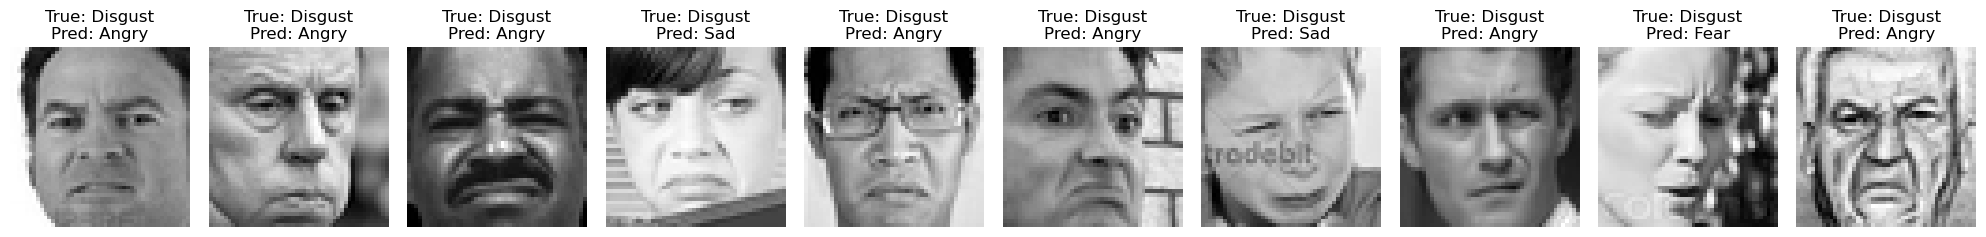

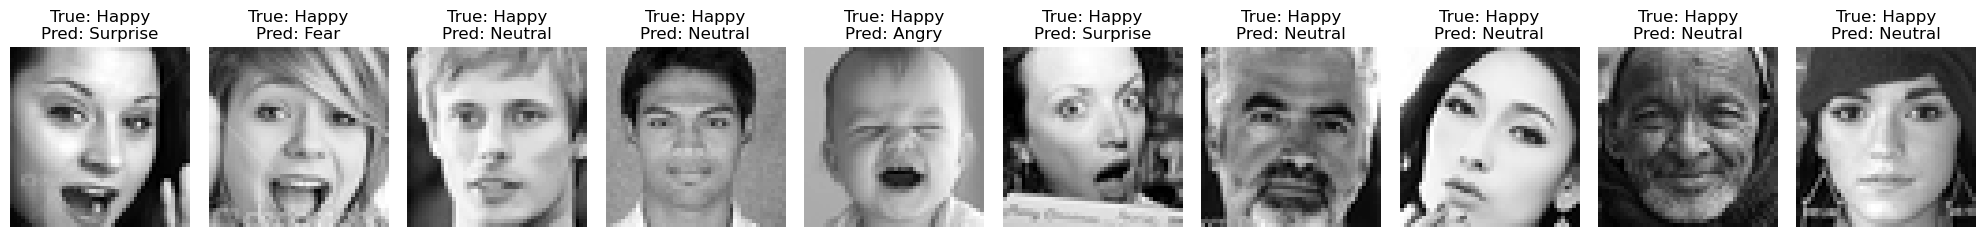

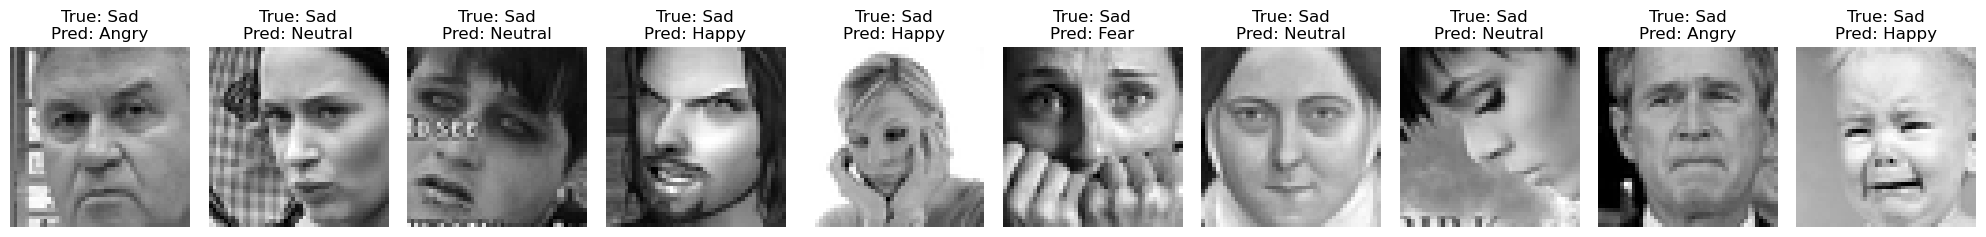

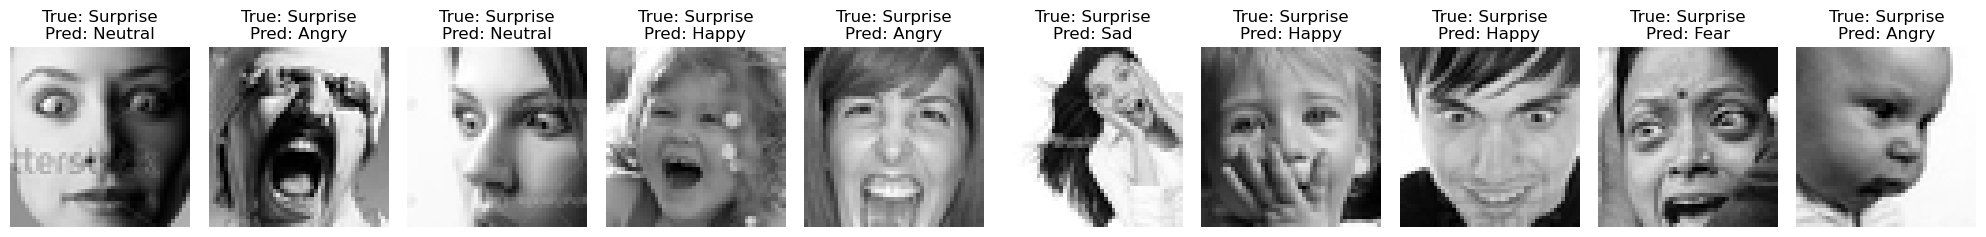

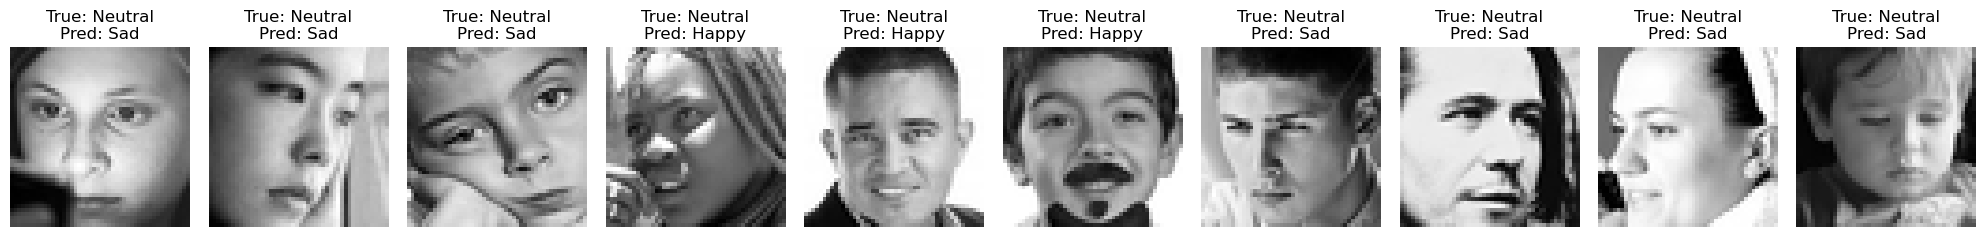

In [39]:
# Find the misclassified Happy indices
for k,em in emotions_map.items():
    if k==2:continue
    misclassified_indices = np.where((y_dev==k)&(y_dev != y_dev_pred))[0]
    
    # Limit to the first 100 misclassified examples
    misclassified_indices = misclassified_indices[:10]
    
    # Plot misclassified examples
    plt.figure(figsize=(20, 20))
    
    for i, index in enumerate(misclassified_indices):
        plt.subplot(10, 10, i + 1)  # Create a grid of 10x10 subplots for 100 examples
        plt.imshow(X_dev[index].reshape(48, 48), cmap='gray')  # Example for image data (reshape if needed)
        plt.title(f'True: {emotions_map[y_dev[index]]}\nPred: {emotions_map[y_dev_pred[index].numpy()]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

 - Angry: 1 out 10 mislabled
 - Discust: 1 out 10 mislabled
 - Happy: 4 out of 10 mislabled
 - Sad: 4 out of 10 mislabled
 - Surprise: 3 out of 10 mislabled
 - Neutral: 7 out of 10 mislabled

**Conclusion**

Given the prevalence of mislabeling in the data and the nuanced differentiation required even for humans, I would conclude that the model performed quite well. The fact that the model's performance is close to the reported human-level performance is reasonably corroborated by our manual inspection of the model's predictions. This suggests that, despite the challenges posed by mislabeled data, the model has achieved a strong performance on this dataset. Overall, I would consider this model's performance to be commendable given the circumstances.


# Model training (Archive)

I tried multiple architectures and hyperparamters. I finally got model_5 to work with a resonable accuracy. Below are some of the model I tried. 

## Model 5

In [ ]:
model_5 = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    # Second Convolutional Block
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    # Third Convolutional Block
    layers.Conv2D(256, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    
    # Fourth Convolutional Block
    layers.Conv2D(512, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    
    # Flattening Layer
    layers.Flatten(),
    
    # Fully Connected Layer
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.15)),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.6),
    
    # Output Layer
    layers.Dense(7, activation='softmax')  # 7 classes for facial expressions
])



In [ ]:
model_5_5 = tf.keras.models.load_model('model_5_5.h5')

In [11]:
for i in range(len(model_5.layers)):  # Adjust the range as needed
    model_5.layers[i].set_weights(model_5_5.layers[i].get_weights())

In [82]:
# Compile the model
model_5.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=train_model(model_5)

Epoch 1/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 124s 70ms/step - accuracy: 0.5951 - loss: 2.7527 - val_accuracy: 0.5797 - val_loss: 2.8094
Epoch 2/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 118s 69ms/step - accuracy: 0.5904 - loss: 2.6983 - val_accuracy: 0.6071 - val_loss: 2.6335
Epoch 3/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 134s 77ms/step - accuracy: 0.5924 - loss: 2.6773 - val_accuracy: 0.5494 - val_loss: 2.8211
Epoch 4/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 116s 67ms/step - accuracy: 0.5840 - loss: 2.6412 - val_accuracy: 0.5744 - val_loss: 2.7184
Epoch 5/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 116s 67ms/step - accuracy: 0.5855 - loss: 2.5979 - val_accuracy: 0.6121 - val_loss: 2.4513
Epoch 6/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 116s 67ms/step - accuracy: 0.5875 - loss: 2.6266 - val_accuracy: 0.5867 - val_loss: 2.6213
Epoch 7/200
 891/1724 ━━━━━━━━━━━━━━━━━━━━ 10:39:37 46s/step - accuracy: 0.5928 - loss: 2.6209

In [ ]:
# model_6.save('model_5_6.h5')
# with open('history_model_5_5.pkl', 'wb') as file:
#     pickle.dump(history,file)

In [15]:
# Manually extracted accuracy and loss values from the log
epochs = list(range(1, 56))

# Training accuracy and loss
train_acc = [
    0.2165, 0.3550, 0.4084, 0.4374, 0.4620, 0.4839, 0.5060, 0.5171, 0.5338, 0.5428,
    0.5586, 0.5610, 0.5705, 0.5775, 0.5847, 0.5931, 0.5989, 0.6032, 0.6099, 0.6105,
    0.6205, 0.6238, 0.6275, 0.6298, 0.6348, 0.6374, 0.6418, 0.6441, 0.6500, 0.6513,
    0.6548, 0.6584, 0.6606, 0.6635, 0.6645, 0.6669, 0.6704, 0.6727, 0.6739, 0.6762,
    0.6762, 0.6791, 0.6870, 0.6831, 0.6842, 0.6883, 0.6869, 0.6922, 0.6950, 0.6980,
    0.6980, 0.6968, 0.6985, 0.7045, 0.7023
]

train_loss = [
    7.2680, 2.7862, 2.7340, 2.6583, 2.5590, 2.4380, 2.2969, 2.1834, 2.0756, 1.9881,
    1.9051, 1.8809, 1.8484, 1.8188, 1.7842, 1.7820, 1.7613, 1.7541, 1.7348, 1.7463,
    1.7361, 1.7244, 1.7224, 1.7308, 1.7533, 1.7187, 1.7053, 1.7029, 1.6694, 1.6793,
    1.6854, 1.6706, 1.6600, 1.6572, 1.6604, 1.6571, 1.6603, 1.6444, 1.6247, 1.6513,
    1.6330, 1.6439, 1.6076, 1.6175, 1.6246, 1.6268, 1.6046, 1.6182, 1.6213, 1.5965,
    1.5939, 1.6178, 1.6110, 1.6044, 1.5798
]

# Validation accuracy and loss
val_acc = [
    0.2777, 0.3270, 0.4071, 0.4163, 0.4431, 0.5005, 0.4597, 0.4630, 0.5297, 0.5204,
    0.5782, 0.5059, 0.5654, 0.5337, 0.5886, 0.5630, 0.5641, 0.5248, 0.6071, 0.5434,
    0.5898, 0.5996, 0.4987, 0.5298, 0.5985, 0.5808, 0.5802, 0.6127, 0.6170, 0.6196,
    0.6000, 0.6090, 0.5861, 0.6006, 0.6103, 0.6050, 0.6062, 0.6195, 0.6076, 0.6273,
    0.6139, 0.6126, 0.5883, 0.5945, 0.6133, 0.6326, 0.6186, 0.5798, 0.5973, 0.5712,
    0.6268, 0.6306, 0.6065, 0.6257, 0.6109
]

val_loss = [
    2.8901, 3.0770, 2.7744, 2.6693, 2.5968, 2.2968, 2.3732, 2.2397, 2.0422, 2.0380,
    1.8521, 2.0661, 1.8670, 1.8864, 1.7623, 1.8825, 1.8190, 1.9488, 1.7482, 1.9090,
    1.7459, 1.7491, 2.0650, 2.0172, 1.8335, 1.9167, 1.9171, 1.7842, 1.7612, 1.7896,
    1.8000, 1.8171, 1.8403, 1.8003, 1.7447, 1.8946, 1.8583, 1.7593, 1.8113, 1.7787,
    1.7786, 1.8212, 1.8364, 1.8441, 1.8179, 1.7646, 1.8702, 1.9376, 1.8881, 1.9874,
    1.8147, 1.7987, 1.8861, 1.8098, 1.8402
]

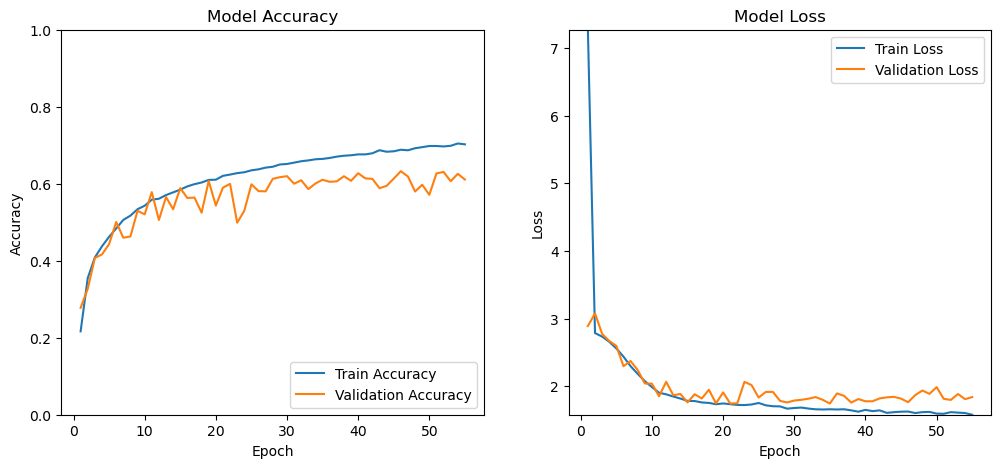

In [17]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([min(train_loss + val_loss), max(train_loss + val_loss)])
plt.legend(loc='upper right')

plt.show()


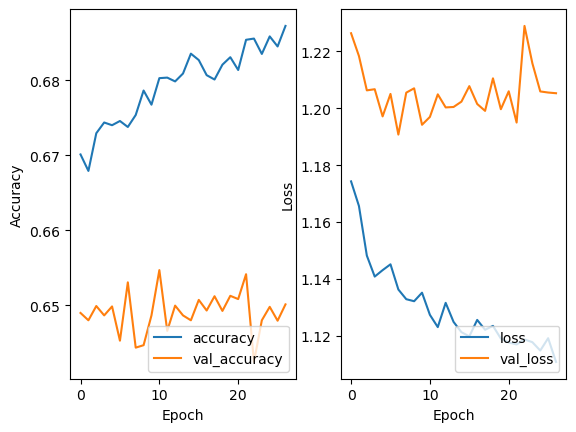

In [30]:
plot_history(history)

## Model 1 (abandoned)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(48, 48, 1)),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),  # Batch Normalization after activation
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3)),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),  # Batch Normalization after activation
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3)),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),  # Batch Normalization after activation
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3)),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),  # Batch Normalization after activation
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    

    layers.Dense(128),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),  # Batch Normalization after activation
    
    layers.Dropout(0.5),
    
    layers.Dense(7, activation='softmax')  # Output layer with softmax activation
])

In [74]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_50 (LeakyReLU)      │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_51 (LeakyReLU)      │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_52 (LeakyReLU)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_53 (LeakyReLU)      │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_54 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 424,071 (1.62 MB)

 Trainable params: 422,855 (1.61 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [81]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [82]:
history = train_model(model)

Epoch 1/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.6896 - loss: 0.8470 - val_accuracy: 0.5713 - val_loss: 1.2174
Epoch 2/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.6929 - loss: 0.8395 - val_accuracy: 0.5694 - val_loss: 1.2225
Epoch 3/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 74s 43ms/step - accuracy: 0.6986 - loss: 0.8205 - val_accuracy: 0.5701 - val_loss: 1.2304
Epoch 4/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 74s 43ms/step - accuracy: 0.7013 - loss: 0.8153 - val_accuracy: 0.5694 - val_loss: 1.2391
Epoch 5/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 75s 43ms/step - accuracy: 0.7008 - loss: 0.8091 - val_accuracy: 0.5697 - val_loss: 1.2440
Epoch 6/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.7129 - loss: 0.7933 - val_accuracy: 0.5709 - val_loss: 1.2499
Epoch 7/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.7025 - loss: 0.8050 - val_accuracy: 0.5707 - val_loss: 1.2555
Epoch 7: early stopping
Restoring model weights from the end of the b

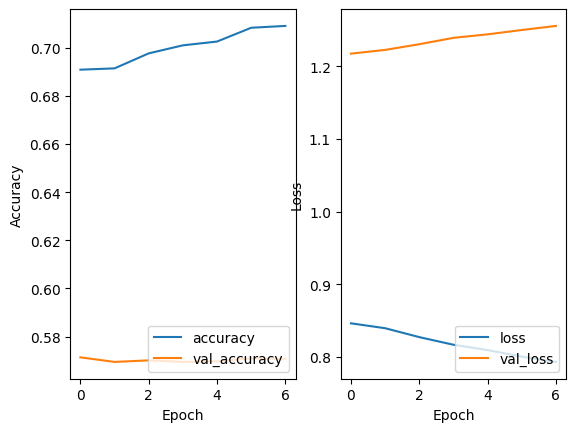

In [83]:
plot_history(history)

## Model 2 (abandoned)

In [17]:
model_1 = model

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (5, 5), input_shape=(48, 48, 1)),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),  # Batch Normalization after activation
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3)),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),  # Batch Normalization after activation
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3)),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),  # Batch Normalization after activation
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3)),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),  # Batch Normalization after activation
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    

    layers.Dense(128),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),  # Batch Normalization after activation
    
    layers.Dropout(0.5),

    layers.Dense(64),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),  # Batch Normalization after activation
    
    layers.Dense(7, activation='softmax')  # Output layer with softmax activation
])
# Copy the weights for layers that match
# for i in range(len(model.layers)-8):  # Adjust the range as needed
#     model.layers[i].set_weights(model_1.layers[i].get_weights())


In [22]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = train_model(model)

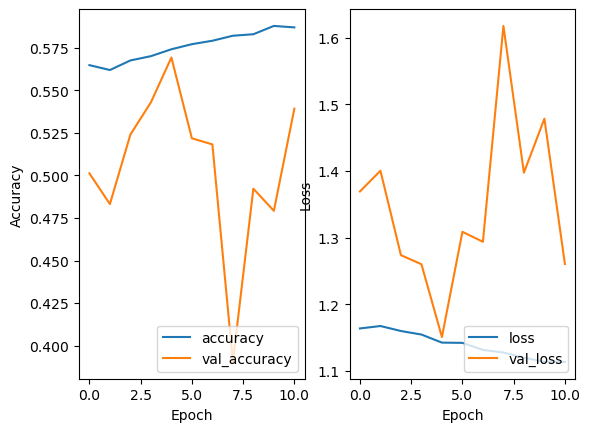

In [40]:
plot_history(history)

## Model 3 (abandoned)

In [32]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(48, 48, 1)),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),  # Adding Dropout after Batch Normalization
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3)),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),  # Adding Dropout after Batch Normalization
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3)),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Adding Dropout after Batch Normalization
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3)),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Adding Dropout after Batch Normalization
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),  # Adding Dropout after Batch Normalization

    layers.Dense(64),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),  # Adding Dropout after Batch Normalization

    layers.Dense(7, activation='softmax')  # Output layer with softmax activation
])

In [41]:
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = train_model(model)

Epoch 1/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.5893 - loss: 1.1039 - val_accuracy: 0.5692 - val_loss: 1.1621
Epoch 2/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 74s 43ms/step - accuracy: 0.5960 - loss: 1.0808 - val_accuracy: 0.5789 - val_loss: 1.1450
Epoch 3/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 74s 43ms/step - accuracy: 0.6008 - loss: 1.0772 - val_accuracy: 0.5759 - val_loss: 1.1499
Epoch 4/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 75s 43ms/step - accuracy: 0.6004 - loss: 1.0744 - val_accuracy: 0.5796 - val_loss: 1.1402
Epoch 5/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 74s 43ms/step - accuracy: 0.6056 - loss: 1.0584 - val_accuracy: 0.5773 - val_loss: 1.1477
Epoch 6/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 75s 43ms/step - accuracy: 0.6045 - loss: 1.0682 - val_accuracy: 0.5766 - val_loss: 1.1419
Epoch 7/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.6027 - loss: 1.0647 - val_accuracy: 0.5798 - val_loss: 1.1376
Epoch 8/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 

In [27]:
import copy

In [35]:
model = copy.copy(model_4)

In [36]:
# Try different architecture with Leaky ReLU
model_4 = models.Sequential([
    layers.Conv2D(32 * 2, (3, 3), input_shape=(48, 48, 1), padding='same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64 * 2, (3, 3), padding='same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128 * 2, (3, 3), padding='same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256 * 2, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.05)),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(512,kernel_regularizer=regularizers.l2(0.05)),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.6),

    layers.Dense(7, activation='softmax')
])

for i in range(len(model.layers)):  # Adjust the range as needed
    model_4.layers[i].set_weights(model.layers[i].get_weights())



In [37]:
model_4.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_model(model_4)